1.1.1 Пример. Проведем прямую y = mx + b через экспериментальные точки.

0.9999999999999997 -0.949999999999999


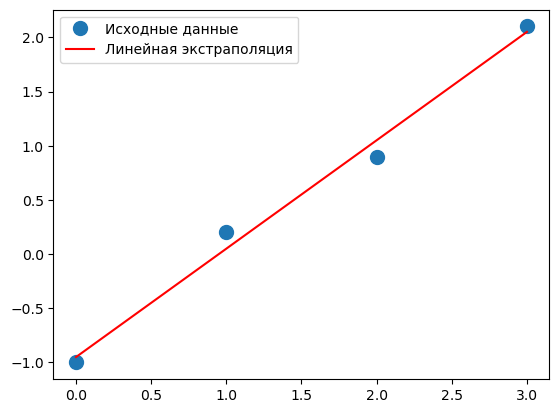

In [1]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
A

m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label = 'Исходные данные', markersize = 10)
plt.plot(x, m*x + c, 'r', label = 'Линейная экстраполяция')
plt.legend()
plt.show()

1.1.2 Пример. Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в
построении эстраполяционного полинома второго порядка (параболы). Таким
образом, необходимо найти такие коэффициенты поринома 𝑎, 𝑏, 𝑐 по методу
наименьших квадратов. Данные мтогут быть получены в результате
измерений. Покажем пример генерации данных случайным образом и
загрузки их из файла.

[-5.33845042 -3.58229896 -3.28005921 -2.35051333 -0.72300956  0.1311991
  0.72166232  1.55984055  3.32758666  4.18052585  5.35913044]
[24.69778868 16.29676648  8.53469795  3.62354271  1.44454611 -0.3792086
  0.90546858  4.32970952  9.44498885 16.12294449 24.52053781]


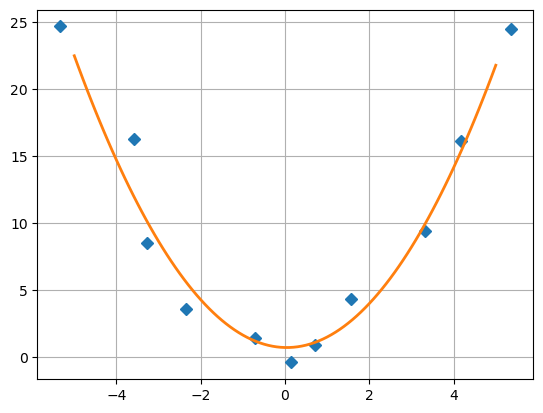

In [2]:
from numpy import *
from numpy. random import *

delta = 1.0
x = linspace(-5, 5, 11)
y = x**2 + delta * (rand(11) - 0.5)
x += delta * (rand(11) - 0.5)

x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')
x = fromfile('x_data.txt', float, sep = '\n')
y = fromfile('y_data.txt', float, sep = '\n')

print(x)
print(y)

m = vstack((x**2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-5, 5, 101)
plt.plot(x, y, 'D')

plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw = 2)
plt.grid()
plt.savefig('парабола.png')

1.1.4 Пример. Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривую вида 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑒𝑥𝑝(−𝑏2𝑥2)

In [3]:
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0, b1 * np.exp(-b2 * x**2)
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

from scipy.optimize import curve_fit 
import scipy as sp
beta_opt, beta_cov = sp.optimize,curve_fit(f, xdata, ydata)
beta_opt
lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()
print(xdata)
print(ydata)

C:\Users\danon\AppData\Local\Temp\ipykernel_1928\322570865.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ydata = y + 0.05 * np.random.randn(len(xdata))


ValueError: operands could not be broadcast together with shapes (2,) (50,) 

1.1.5 Задача. Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривые вида:
1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥
2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥 2 
3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)
4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥 𝑏1

[0.26132936 0.74038418]
0.00018445424312810876
0.16219252862514633


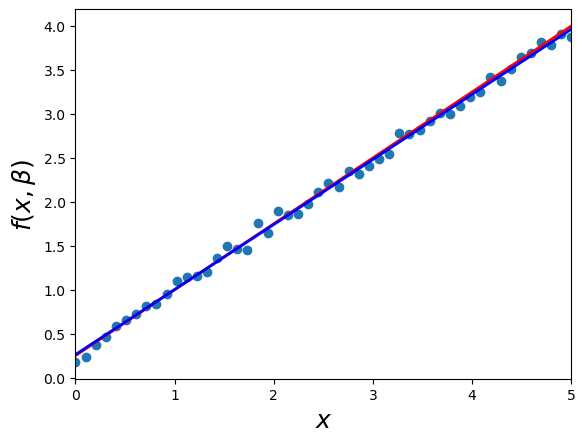

[0.23493286 0.7569202  0.49904604]
0.00014200981487170393
0.11842132281501033


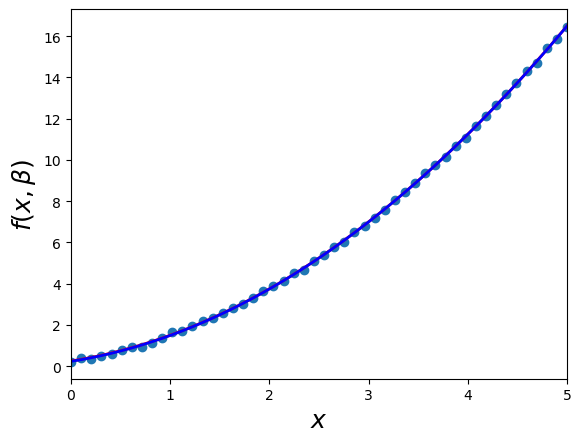

[1.00071391 1.99123186]
4.6303279844580675e-05
0.10707362124823666


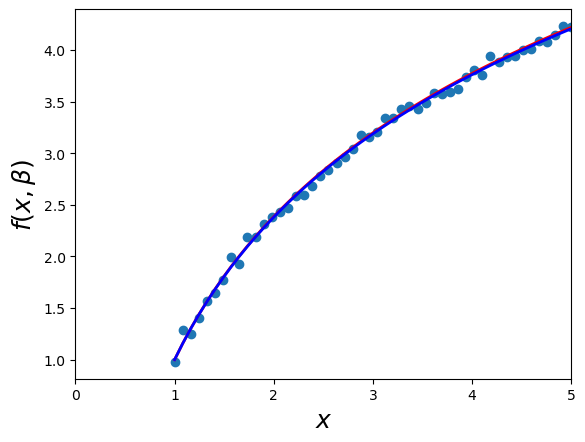

[0.99853926 2.00074143]
6.319305424259595e-06
0.15106112425854812


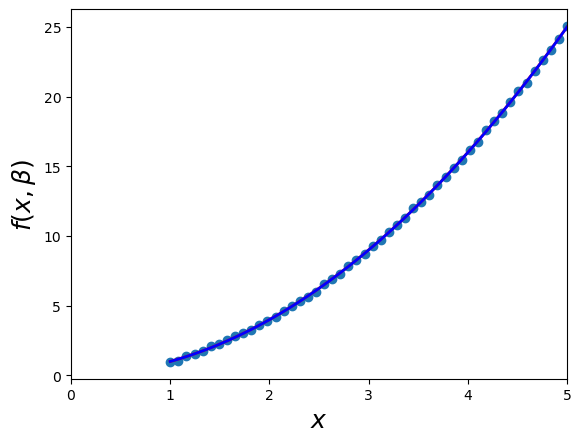

In [ ]:
#решение 1

import scipy as sp
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()

#решение 2

beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1*x + b2*x*x
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()

#решение 3

beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()

#решение 4

beta = (1, 2)
def f(x, b0, b1):
    return b0 * x**b1
xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()

In [ ]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1.4, 0, 0.7, 2.5])
#Перепишем линейное уравнение у = тх + с как у = Ар, где A = [[ × 1 J] и р = [[m], [c]]
#Построим А по х :
A = np.vstack([x, np.ones(len (x))]).T

Задание: Подставьте собственные данные и поэкспериментируйте с предстамоенными функциями. Проанализируйте динамику изменения данных.

In [ ]:
#Используем метод lstsq для решения его относительно вектора р.
m, c = np.linalg.lstsq(A, y, rcond = None) [0]
print (m, c)

1.2399999999999995 -1.409999999999999


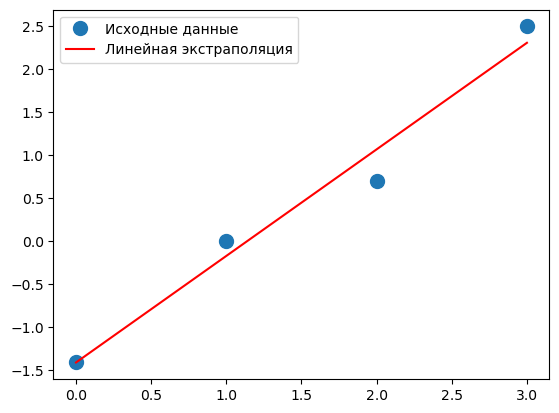

In [ ]:
#Построим график полученной прямой и укажем на нем точки.
import matplotlib.pyplot as plt
plt.plot(x, y,'o', label= 'Исходные данные', markersize=10)
plt.plot(x, m*x + c,'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

In [ ]:
from numpy import *
from numpy.random import *
#генерируем случайные × и у
delta = 1.0
x = linspace(-5,5,20)
y = x**2+delta* (rand (20)-0.5)
x += delta* (rand (20)-0.5)

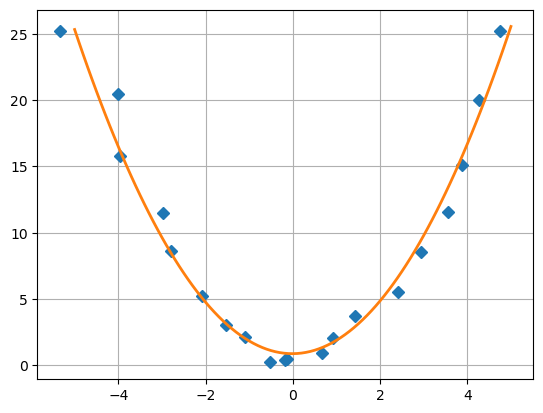

In [ ]:
# Нахождение коэффициентов функции вида у = ах^2 + bx + с методом наименьших квадратов # задаем вектор m = [x**2, X, E]
m = vstack((x**2, x, ones (len(x)))).T
# находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]
# на отрезке [-5,5]
x_prec = linspace(-5, 5, 101)
# рисуем точки
plt.plot (x, y, 'D')
# рисуем кривую вида у = ах^2 + bx + с, подставляя из решения коэффициенты 5[0], 5[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2],'-', lw=2)
plt.grid()
plt.savefig('парабола.png')

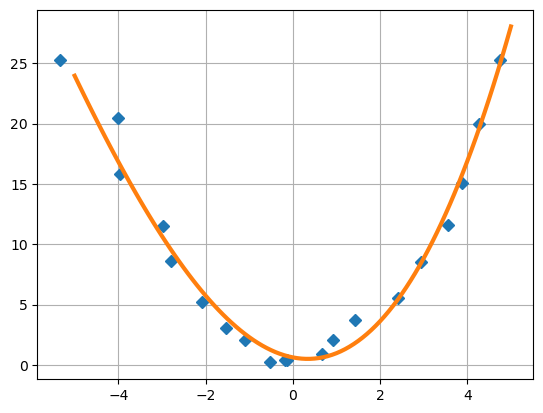

In [ ]:
#Решение
# Нахождение коэффициентов функции вида у = ах^3 + bx^2 + с× + d методом наименьших квадратов # задаем вектор m = [x**3, X, E]
m = vstack((x**3, x**2, x, ones (len(x)))). T
# находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq (m, y, rcond = None)[0]
# на отрезке [-5,5]
X_prec = linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида у = ах^3 + bx^2 + с× + d, подставляя из решения коэффициенты 5[0], 5[1], 5[2], s[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3],'-', lw = 3)
plt.grid()
plt.savefig('полином 3-й степени.png')

In [ ]:
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, be, b1, b2):
  return be + b1 * np.exp(-b2 * x**2)
# зададим массив точек хі
xdata = np.linspace(0, 20, 50)
# создаем теоретически правильные значения точек уі (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.2 * np.random.randn(len(xdata))

[0.27882159 0.81404139 0.62417365]
0.0019427900049500053
1.7376880459804707


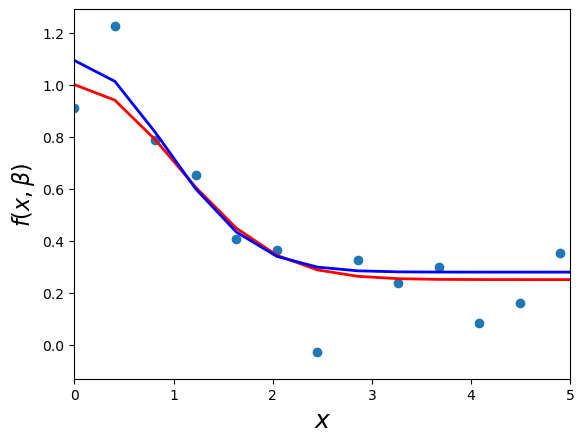

In [ ]:
#Используем функцию для получения решения 6 виде коэффициентов функции f(х) для указанных xdata u ydata
from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata, y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=16)
plt.show()

In [ ]:
#решение
#1
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75)
def f(x, b0, b1):
  return b0 + b1 * x
# зададим массив точек хі
xdata = np.linspace(0, 10, 80)
# создаем теоретически правильные значения точек уі (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.5 * np.random.rand(len (xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dey = sum (beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals = xdata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.47202588 0.75735882]
0.0019427900049500053
84.19131781716197


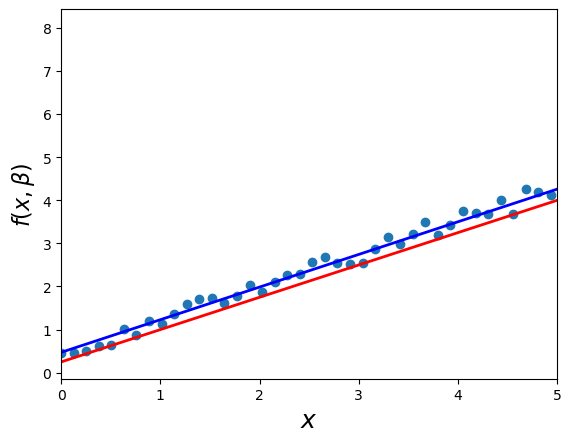

In [ ]:
fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata, y,'r',label= 'Исходные данные',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=16)
plt.show()

In [ ]:
#решение
#2
#Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, be, b1, b2):
  return be + b1 * x + b2 * x * x
# зададим массив точек хі
xdata = np.linspace(0, 4, 100)
# создаем теоретически правильные значения точек уі (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.2 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals = xdata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.27354275 0.71698941 0.50540463]
0.0006818028154684336
1032.984467645372


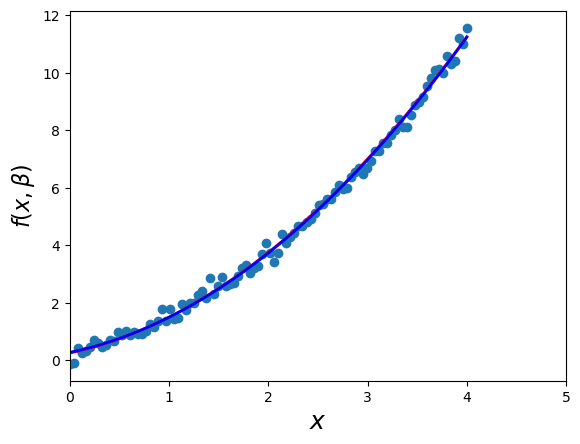

In [ ]:
def f(x, be, b1, b2):
  return be + b1 * x + b2 * x * x
fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',label= 'Исходные данные',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=16)
plt.show()

In [ ]:
#решение
#3
#Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, be, b1):
  return be + b1 * np. log (x)
# зададим массив точек хі
xdata = np.linspace(1, 6, 150)
# создаем теоретически правильные значения точек уі (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.08 * np.random.rand(len (xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print (beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[1.04916757 1.99544925]
5.357412314665364e-06
0.06879072684630158


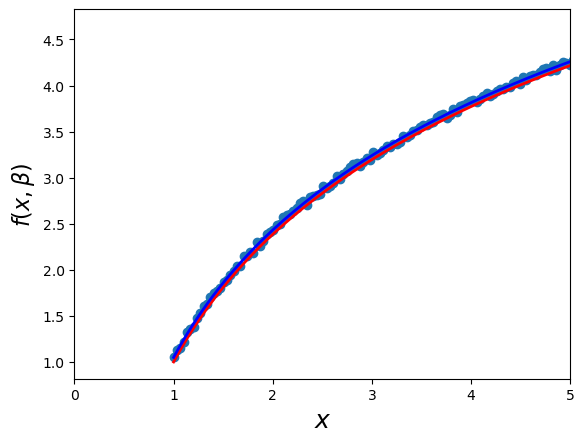

In [ ]:
fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',label= 'Исходные данные',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=16)
plt.show()

In [ ]:
#решение
#4
#Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, be, b1):
  return be * x ** b1
# зададим массив точек хі
xdata = np.linspace(1, 5, 20)
# создаем теоретически правильные значения точек уі (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 5 * np.random.randn(len (xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals = xdata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[2.38851776 1.35400483]
1.4176357198770444
1689.0724076461936


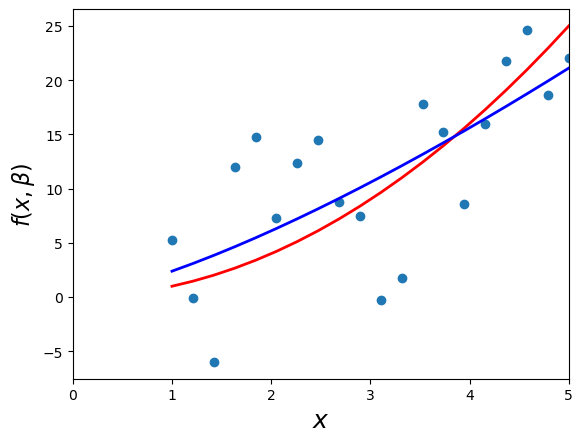

In [ ]:
fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',label= 'Исходные данные',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=16)
plt.show()

Вывод: чем больше зашумлены данные, тем более график отдаляется от первоначального/идеального варианта

1.2.1 Пример. Построим простую линейную регрессию в Python с использованием библиотеки scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

my_dict = {'Учебное время': [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50],
           'Оценка': [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93]}
dataset = pd.DataFrame(my_dict)
dataset.head()

print(dataset.shape)
dataset.describe()

(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.787500,53.700000
std,1.507165,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


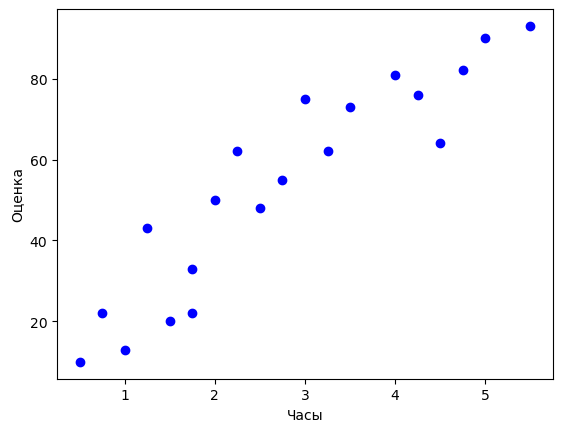

In [ ]:
plt.scatter(dataset['Учебное время'], dataset['Оценка'], color = 'b', label = 'данные экзамена')
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

Задание. Постройте модель линейной регрессии для произвольных данных из двух столбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы: (https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear- regression/master/Salary_Data.csv). Найдите коэффициенты линии регрессии. Постройте прогноз.

27625.04119132075 [8780.54133512]
      Actual      Predicted
0    83088.0   74161.910267
1    98273.0   89966.884671
2    63218.0   61869.152398
3    93940.0   80308.289202
4    61111.0   67137.477199
5    91738.0   87332.722270
6   116969.0  111040.183875
7    43525.0   45186.123862
8   109431.0  104015.750807
9   101302.0   96991.317739
10  113812.0   99625.480139
11   39891.0   46942.232129
Mean Squared Error: 60735731.418051265


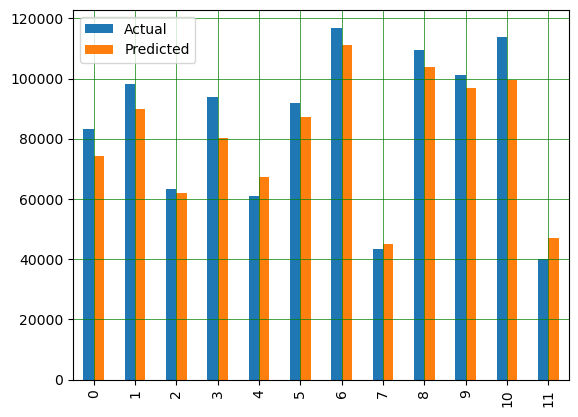

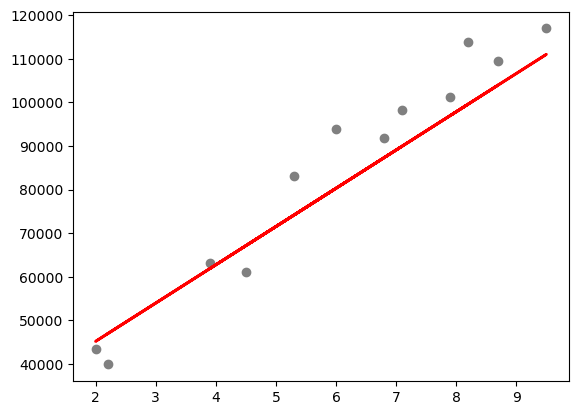

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
database = pd.read_csv(url)
X_train, X_test, y_train, y_test = train_test_split(database.iloc[:,0].values, database.iloc[:, 1].values, test_size=0.4, random_state =1)
regressor = LinearRegression()
regressor.fit(np.array(X_train).reshape(-1,1), y_train)
print(regressor.intercept_, regressor.coef_)
y_pred = regressor.predict(np.array(X_test).reshape(-1,1))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)
print('Mean Squared Error:', metrics.mean_squared_error (y_test, y_pred))
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black') 
plt.show()
plt.scatter(X_test, y_test, color='gray') 
plt.plot(X_test, y_pred, color='red', linewidth=2) 
plt.show()

Задание. Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз.

                              Coefficents
Petrol_tax                     -32.003954
Average_income                  -0.075188
Paved_Highways                  -0.002137
Population_Driver_licence(%)  1355.827606
   Actual   Predicted
0     628  621.250921
1     547  463.618291
2     648  727.431022
3     640  646.094665
4     561  585.209891
5     414  486.869741
6     554  587.673738
7     577  597.031210
8     782  702.923921
9     631  617.312283
Mean Squared Error: 2721.6159571932176


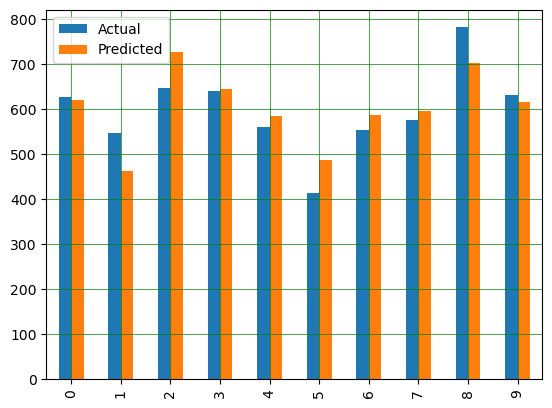

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
url = 'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
database = pd.read_csv(url)
X_train, X_test, y_train, y_test = train_test_split(database.iloc[:,:-1].values, database.iloc[:, -1].values, test_size=0.2, random_state =1)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
coefs = pd.DataFrame(regressor.coef_, database.iloc[:,:-1].columns, columns = ['Coefficents'])
print(coefs)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)
print('Mean Squared Error:', metrics.mean_squared_error (y_test, y_pred))
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black') 
plt.show()

Вывод: портребление топлива почти напрямую зависит от количества людей с правами на управление автомобилем и почти не зависит от других параметров

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
database = pd.read_csv(url)
X_train, X_test, y_train, y_test = train_test_split(database.iloc[:,:-1].values, database.iloc[:, -1].values, test_size=0.1, random_state =1)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
coefs = pd.DataFrame(regressor.coef_, database.iloc[:,:-1].columns, columns = ['Coefficents'])
print(coefs)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)
print('Mean Squared Error:', metrics.mean_squared_error (y_test, y_pred))

Вывод: качество вина зависит от сульфитов и алкоголя, минимальное воздействие на качество вина оказывают плотность, хлориды и летучие кислоты

Задание. Экспериментально получены N − значений величины Y при различных значениях величины X. Построить полиномы первой и второй степени, аппроксимирующие результаты эксперимента, с применением метода наименьших квадратов. Результаты выводятся в виде таблиц значений и графиков, полученных полиномов.

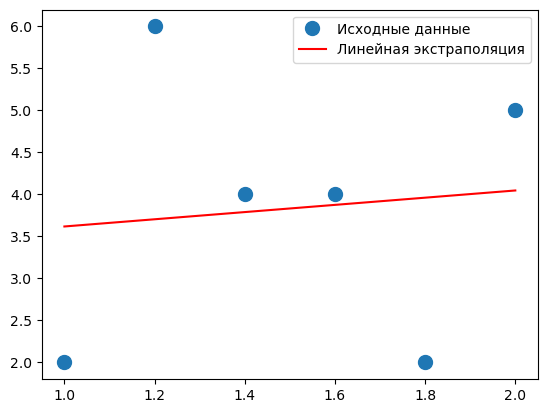

x   - y
1.0 - 3.619047619047617
1.2 - 3.704761904761903
1.4 - 3.790476190476189
1.6 - 3.876190476190475
1.8 - 3.9619047619047607
2.0 - 4.047619047619047


[None, None, None, None, None, None]

In [6]:
x = np.array([i/10 for i in range(10,21,2)])
y = np.array([2,6,4,4,2,5])
a=np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(a, y, rcond = None) [0]
plt.plot(x, y,'o', label= 'Исходные данные', markersize=10)
plt.plot(x, m*x + c,'r', label='Линейная экстраполяция')
plt.legend ( )
plt.show()
print('x   - y')
[print(f'{i} - {m*i + c}')for i in x]

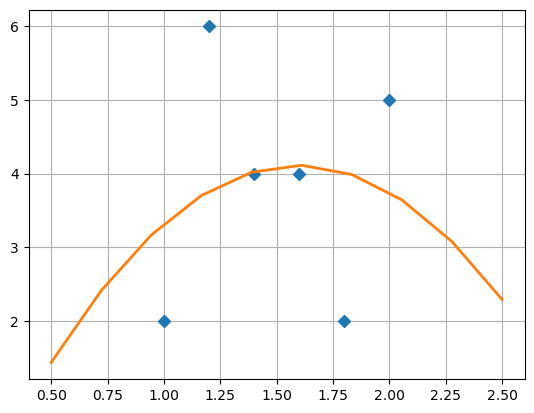

x   - y
1.0 - 3.321428571428573
1.2 - 3.7642857142857213
1.4 - 4.028571428571439
1.6 - 4.114285714285724
1.8 - 4.021428571428581
2.0 - 3.750000000000007


[None, None, None, None, None, None]

In [7]:
m = np.vstack((x**2, x, np.ones (len(x)))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]
x_prec = np.linspace(0.5, 2.5, 10)
plt.plot (x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2],'-', lw=2)
plt.grid()
plt.show()
print('x   - y')
[print(f'{i} - {s[0] * i**2 + s[1] * i+s[2]}')for i in x]